<a href="https://colab.research.google.com/github/zainmo11/Credit_card_fraud_Detection/blob/main/Credit_card_fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **01. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings


warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# **02. Load Dataset**

In [2]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0


In [4]:
!unzip creditcardfraud.zip


Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [5]:
df = pd.read_csv('creditcard.csv',engine='pyarrow',dtype_backend='pyarrow')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.16648,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.37978,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.1083,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.5,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.20601,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.dtypes

,0
Time,double[pyarrow]
V1,double[pyarrow]
V2,double[pyarrow]
V3,double[pyarrow]
V4,double[pyarrow]
V5,double[pyarrow]
V6,double[pyarrow]
V7,double[pyarrow]
V8,double[pyarrow]
V9,double[pyarrow]


In [7]:
# Make Time column as int64 and Class as boolean
df['Time'] = df['Time'].astype('int64')
df['Class'] = df['Class'].astype('bool')

In [8]:
df.dtypes

,0
Time,int64
V1,double[pyarrow]
V2,double[pyarrow]
V3,double[pyarrow]
V4,double[pyarrow]
V5,double[pyarrow]
V6,double[pyarrow]
V7,double[pyarrow]
V8,double[pyarrow]
V9,double[pyarrow]


In [9]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.01448,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,False
284803,172787,-0.732789,-0.05508,2.03503,-0.738589,0.868229,1.058415,0.02433,0.294869,0.5848,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,False
284804,172788,1.919565,-0.301254,-3.24964,-0.557828,2.630515,3.03126,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,False
284805,172788,-0.24044,0.530483,0.70251,0.689799,-0.377961,0.623708,-0.68618,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.0,False
284806,172792,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.41465,0.48618,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.0,False


# **03. Data Issues**

In [10]:
# check missing values
print("Missing Values:",df.isnull().sum())

Missing Values: Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [11]:
# check duplicate
print("Duplicates:",df.duplicated().sum())

Duplicates: 1081


In [12]:
# Display some duplicate rows for inspection
duplicate_rows = df[df.duplicated(keep=False)]
print("\nSample of Duplicate Rows:\n", duplicate_rows.head())


Sample of Duplicate Rows:
      Time        V1        V2        V3        V4        V5        V6  \
32     26 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
33     26 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
34     26 -0.535388  0.865268  1.351076  0.147575   0.43368  0.086983   
35     26 -0.535388  0.865268  1.351076  0.147575   0.43368  0.086983   
112    74   1.03837  0.127486  0.184456   1.10995  0.441699  0.945283   

           V7        V8        V9  ...       V21       V22       V23  \
32   0.711206  0.176066 -0.286717  ...  0.046949  0.208105 -0.185548   
33   0.711206  0.176066 -0.286717  ...  0.046949  0.208105 -0.185548   
34   0.693039  0.179742 -0.285642  ...  0.049526  0.206537 -0.187108   
35   0.693039  0.179742 -0.285642  ...  0.049526  0.206537 -0.187108   
112 -0.036715  0.350995   0.11895  ...   0.10252  0.605089  0.023092   

          V24       V25       V26       V27       V28  Amount  Class  
32   0.001031  0.098816 -0.55

In [13]:
# Check if duplicates are fraud or non-fraud
duplicate_class_dist = duplicate_rows['Class'].value_counts()
print("\nClass Distribution of Duplicates:\n", duplicate_class_dist)


Class Distribution of Duplicates:
 Class
False    1822
True       32
Name: count, dtype: int64


In [14]:
# Number of every class
class_dist = df['Class'].value_counts()
class_dist

,count
Class,
False,284315
True,492


In [15]:
# Calculate the percentage of duplicates for each class
fraud_percentage = (duplicate_class_dist.get(1, 0) / class_dist.get(1, 0)) * 100
non_fraud_percentage = (duplicate_class_dist.get(0, 0) / class_dist.get(0, 0)) * 100

# Print the percentages
print(f"Percentage of Duplicate Non-Fraud Transactions: {non_fraud_percentage:.2f}%")
print(f"\nPercentage of Duplicate Fraud Transactions: {fraud_percentage:.2f}%")

Percentage of Duplicate Non-Fraud Transactions: 0.64%

Percentage of Duplicate Fraud Transactions: 6.50%


**Note:** So, it is better to remove **duplicates**

# **04. Data Preprocessing**

In [16]:
df = df.drop_duplicates()
# check duplicate
print("Duplicates:",df.duplicated().sum())

Duplicates: 0


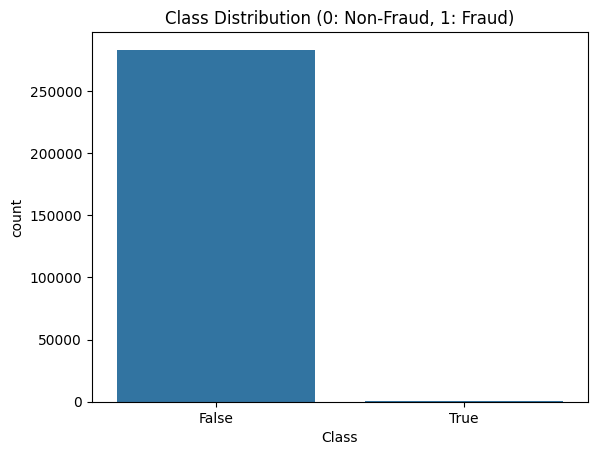

In [17]:
# Visualize class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.show()

Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud.


we don't want our model to assume, we want our model to detect patterns that give signs of fraud

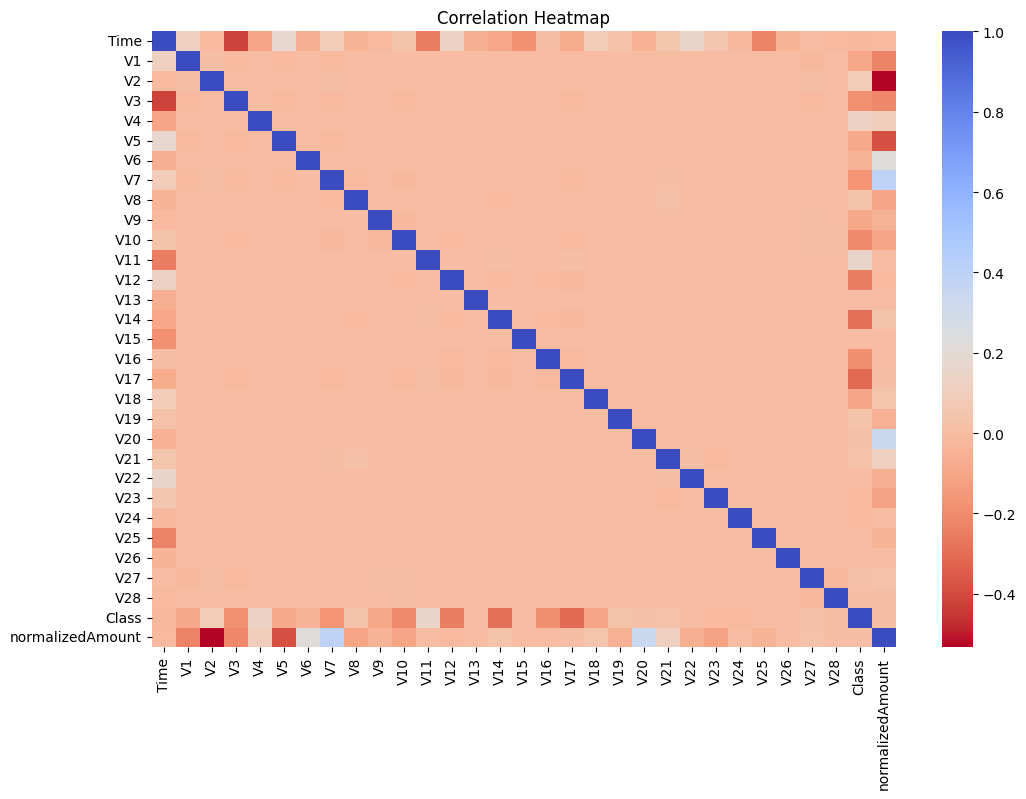

In [41]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('Correlation Heatmap')
plt.show()
